<a href="https://colab.research.google.com/github/satishjasthi/IkeaProductClassification/blob/master/ResNext_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traning ResNext_50 to identify products from IKEA

## Imports

In [0]:
from pathlib import Path
import torchvision
from fastai.vision import *
from fastai.callbacks import *
from fastai.metrics import error_rate

## Create train and test data generators

In [0]:
bs = 64
data_dir = Path('/content/IkeaProductClassification/data/model_data')
data = ImageDataBunch.from_folder(path=data_dir, 
                                  ds_tfms=get_transforms(), 
                                  size=224, 
                                  bs=bs
                                  ).normalize(imagenet_stats)


### visualize data samples

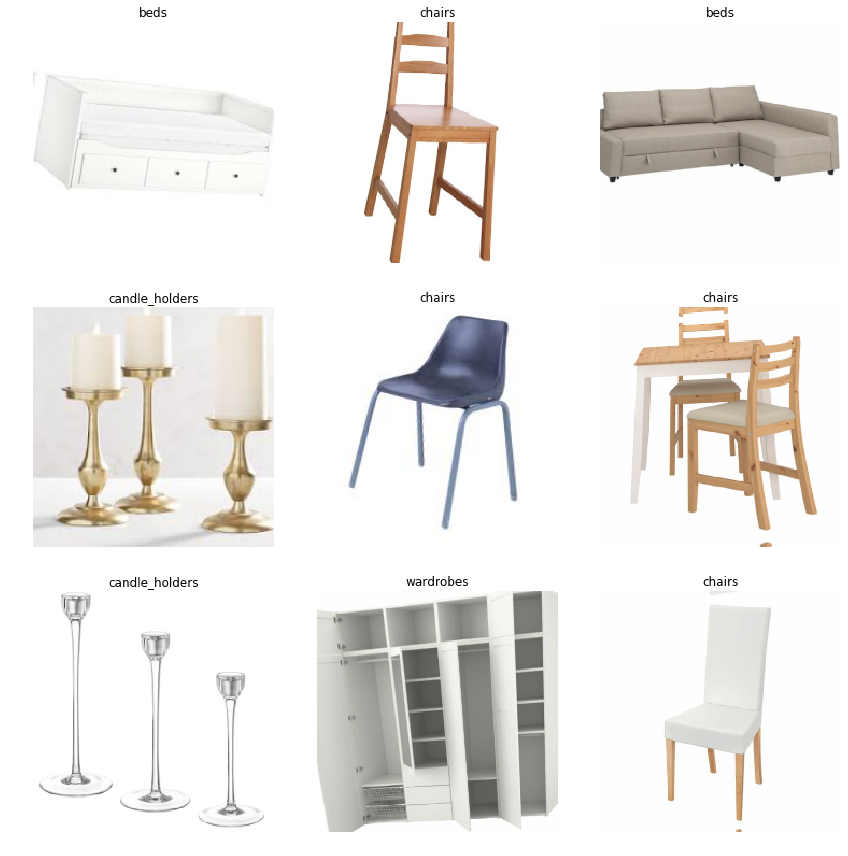

In [15]:
data.show_batch(rows=3)

### Classes in data

In [5]:
data.classes

['beds', 'candle_holders', 'chairs', 'wardrobes']

## Define ResNext50 model

In [6]:
resnet_model = cnn_learner(data, base_arch=torchvision.models.resnext50_32x4d, metrics=[error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/checkpoints/resnext50_32x4d-7cdf4587.pth
100%|██████████| 95.8M/95.8M [00:01<00:00, 93.2MB/s]


In [7]:
resnet_model.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [128, 56, 56]        8,192      False     
______________________________________________________________________
BatchNorm2d          [128, 56, 56]        256        True      
______________________________________________________________________
Conv2d               [128, 56, 56]        4,608      False     
___________________________________________________

### Train model

In [8]:
resnet_model.fit_one_cycle(25, callbacks=[SaveModelCallback(resnet_model, every='best', monitor='accuracy')]) 

/usr/local/lib/python3.6/dist-packages/fastai/callbacks/tracker.py:83: UserWarning: SaveModel every best is invalid, falling back to "improvement".
  warn(f'SaveModel every {self.every} is invalid, falling back to "improvement".')


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.751812,0.212269,0.079812,0.920188,00:58
1,0.413839,0.106651,0.056338,0.943662,00:48
2,0.281750,0.212064,0.065728,0.934272,00:48
3,0.228827,0.126671,0.037559,0.962441,00:48
4,0.191781,0.120571,0.032864,0.967136,00:49
5,0.149558,0.137154,0.046948,0.953052,00:49
6,0.127478,0.184113,0.042254,0.957747,00:48
7,0.109667,0.089752,0.037559,0.962441,00:48
8,0.089678,0.089512,0.037559,0.962441,00:48
9,0.075662,0.103425,0.051643,0.948357,00:48


Better model found at epoch 0 with accuracy value: 0.920187771320343.
Better model found at epoch 1 with accuracy value: 0.9436619877815247.
Better model found at epoch 3 with accuracy value: 0.9624413251876831.
Better model found at epoch 4 with accuracy value: 0.9671361446380615.
Better model found at epoch 12 with accuracy value: 0.9718309640884399.
Better model found at epoch 13 with accuracy value: 0.9765258431434631.
Better model found at epoch 15 with accuracy value: 0.9812206625938416.
Better model found at epoch 18 with accuracy value: 0.9906103014945984.


## Training and validation losses

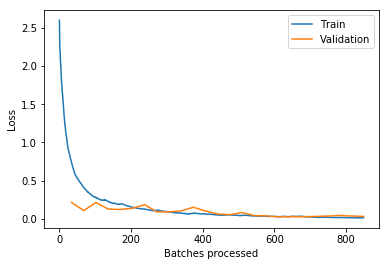

In [9]:
resnet_model.recorder.plot_losses()

## Validation error_rate and accuracy

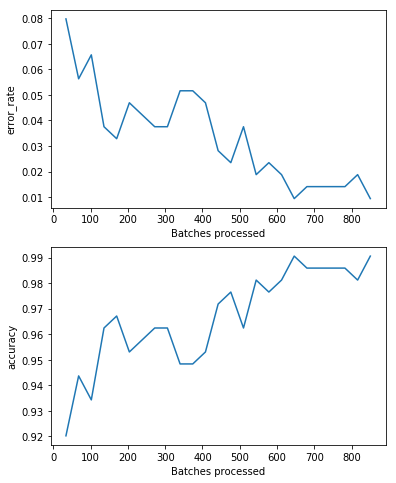

In [10]:
resnet_model.recorder.plot_metrics()

## One Cycle lr policy used

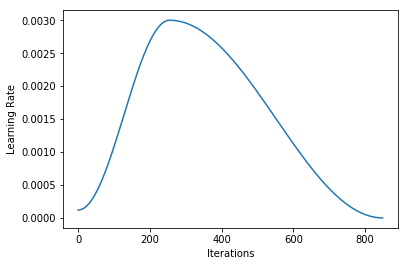

In [11]:
resnet_model.recorder.plot_lr()

## Interpret model predictions

Results are sorted in a way that model's top worst predictions are shown first along with the heatmap which highlights the prominent features model is looking into to make predictions.

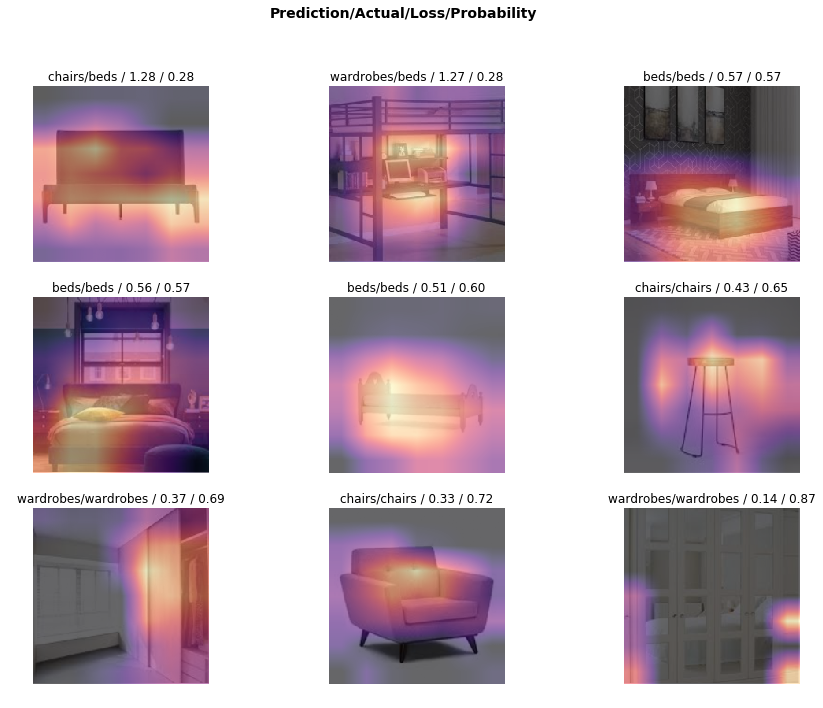

In [12]:
interp = ClassificationInterpretation.from_learner(resnet_model)
interp.plot_top_losses(9, figsize=(15,11), heatmap=True)

### Confusion matrix

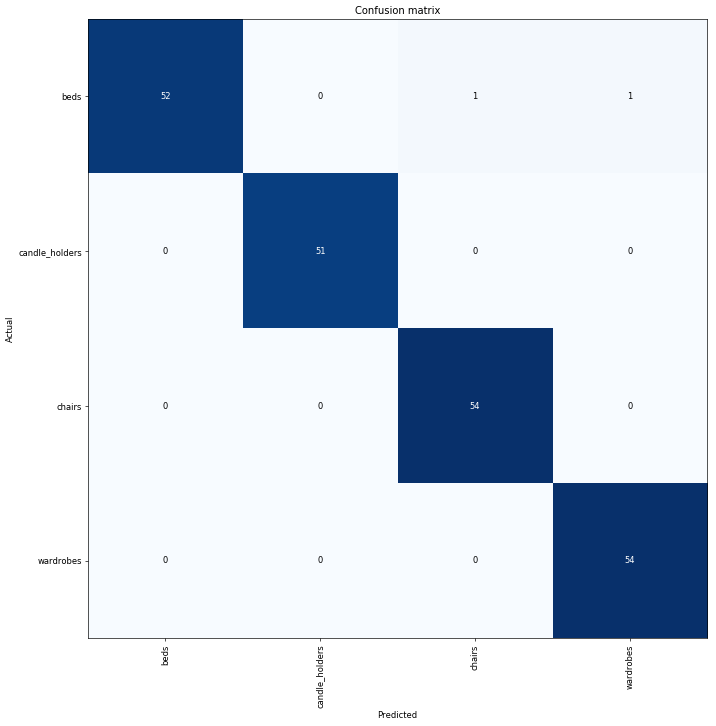

In [13]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

## Save model

In [0]:
resnet_model.save('resnext50_ikea')